In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns =['sepal_length','sepal_width','petal_length','petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#init의 default는 'k-means++'
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter=300,random_state = 0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [6]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
iris_result = df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


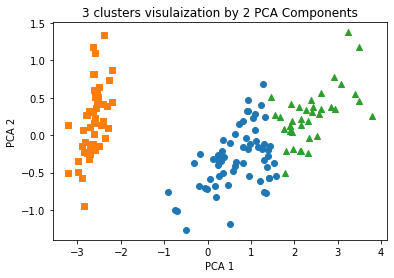

In [11]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0 = df[df['cluster'] == 0].index
marker1 = df[df['cluster'] == 1].index
marker2 = df[df['cluster'] == 2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출.o,s,^로 마커 표시
plt.scatter(x=df.loc[marker0,'pca_x'],y=df.loc[marker0,'pca_y'],marker='o')
plt.scatter(x=df.loc[marker1,'pca_x'],y=df.loc[marker1,'pca_y'],marker='s')
plt.scatter(x=df.loc[marker2,'pca_x'],y=df.loc[marker2,'pca_y'],marker='^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("3 clusters visulaization by 2 PCA Components")
plt.show()